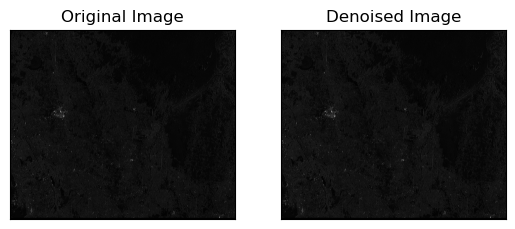

In [1]:
#Noise Reduction
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("C:\\Users\\Syscom\\Desktop\\Digital image processing images\\HH-ALPSRP247640510-H2.2_UA.tif", 0)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0) 
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [2]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

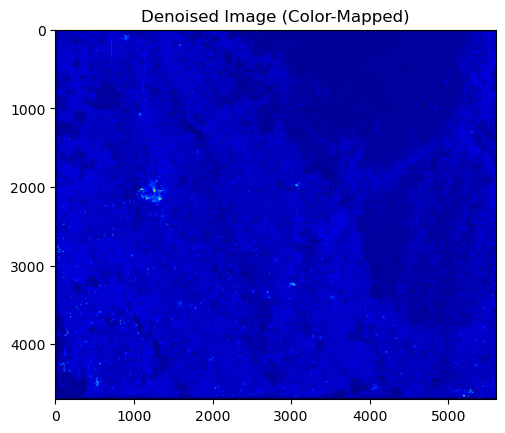

In [3]:
#Color Mapping
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C:\\Users\\Syscom\\Desktop\\Digital image processing images\\HH-ALPSRP247640510-H2.2_UA.tif", 0)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

In [4]:
#Mean Squared Error
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread("C:\\Users\\Syscom\\Desktop\\Digital image processing images\\HH-ALPSRP247640510-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 6.394902089665654


In [5]:
#Structural Similarity Index (SSIM)
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread("C:\\Users\\Syscom\\Desktop\\Digital image processing images\\HH-ALPSRP247640510-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9301179653440952


In [6]:
#Reading Specific Pixel Value
import cv2
import numpy as np

original_image = cv2.imread(r"C:\\Users\\Syscom\\Desktop\\Digital image processing images\\HH-ALPSRP247640510-H2.2_UA.tif", 0) 

denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 24
Denoised pixel value at (150, 150): 22


Original Image Amplitude (Magnitude):
[[1771.         1048.59708375 5739.47224687 ... 4746.16306878
  5739.47224687 1048.59708375]
 [2832.88008568 3315.87507933 2377.45783563 ... 1437.9662329
  2187.05298043 1157.01231863]
 [ 150.7021529  5333.72240525  274.95257287 ... 4010.18858855
   750.69670719 3372.94423214]
 ...
 [4639.87887231 3544.75356204  902.74290792 ... 3147.14759997
  3121.00836614 4456.24452868]
 [ 150.7021529  3372.94423214  750.69670719 ...  832.38116361
   274.95257287 5333.72240525]
 [2832.88008568 1157.01231863 2187.05298043 ... 3634.11602023
  2377.45783563 3315.87507933]]
Denoised Image Amplitude (Magnitude):
[[1732.         1434.63274127 2497.42559971 ...  541.56318511
  2497.42559971 1434.63274127]
 [ 576.11785805 1085.44721889 1931.51598408 ... 1473.43241827
  1171.07378144  995.4218842 ]
 [1455.82277852 2218.87452815 1774.88375567 ... 1019.23537824
  1506.75353036  928.6915794 ]
 ...
 [1660.67876906 1731.3478622  1725.82141359 ... 2019.77203488
  1306.74340856

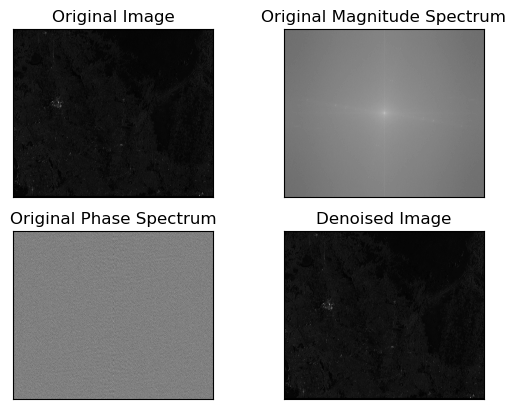

In [9]:
#Fourier Transform
import cv2
import numpy as np
import matplotlib.pyplot as plt

original_image = cv2.imread(r"C:\\Users\\Syscom\\Desktop\\Digital image processing images\\HH-ALPSRP247640510-H2.2_UA.tif", 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)


if original_image is not None and denoised_image is not None:
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)
    
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")